# 전처리

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder # for encoding
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler #for standardization
from sklearn.model_selection import train_test_split
import time

In [5]:
def preprocessing(df_scaling, scaled_form = 'MinMaxScaler()'):
    # 불필요한 컬럼 제거
    if 'ID' in df_scaling:
        df_scaling = df_scaling.drop("ID", axis = 1)
        if len(df_scaling.columns) == 1:
            return df_scaling
        
        df_scaling = df_scaling.drop('oral', axis = 1) 
        # 범주형 피처 레이블 인코딩 
        cate_features = df_scaling[['gender','tartar']]

        lbe = LabelEncoder()
        lbe.fit_transform(df_scaling["gender"])
        df_scaling["gender"] = lbe.fit_transform(df_scaling["gender"])

        lbe = LabelEncoder()
        lbe.fit_transform(df_scaling["tartar"])
        df_scaling["tartar"] = lbe.fit_transform(df_scaling["tartar"])
        # hearing 피처 1, 2 => 1, 0으로 변환
        df_scaling['hearing(left)'] = df_scaling['hearing(left)'].apply(lambda x: x-2 if x ==2.0 else x )
        df_scaling['hearing(right)'] = df_scaling['hearing(right)'].apply(lambda x: x-2 if x ==2.0 else x )
        
        # BMI 지수 계산
        # bmi = kg/m^2
        #df_scaling['bmi'] = df_scaling['weight(kg)']/((df_scaling['height(cm)']*0.01)**2)
        # wwi(비만 지수) 지수 계산
        #df_scaling['wwi'] = df_scaling['waist(cm)']/(df_scaling['weight(kg)'].apply(np.sqrt))
        return df_scaling

In [6]:
def scaling(train_data, test_data, scaled_form = 'MinMaxScaler()'):
    # 형태 별 특성 구분
    train_data = preprocessing(train_data)
    test_data = preprocessing(test_data)
    tr_cate_features = train_data[['gender', 'tartar', 'hearing(right)', 'hearing(left)', 'dental caries']]
    tr_scaled_features = train_data.drop(tr_cate_features.columns, axis=1)
    
    ts_cate_features = test_data[['gender', 'tartar', 'hearing(right)', 'hearing(left)', 'dental caries']]
    ts_scaled_features = test_data.drop(ts_cate_features.columns, axis=1)
    
    if scaled_form == 'StandardScaler()':
        # Standard scaler
        scaler = StandardScaler()
        scaler.fit(tr_scaled_features) # 훈련 데이터에 fit() 적용
        
        # 훈련 데이터와 테스트 데이터에 transform()을 통해 변환
        tr_scaled = scaler.transform(tr_scaled_features)
        ts_scaled = scaler.transform(ts_scaled_features)
        
        train_std_scaled = pd.DataFrame(tr_scaled, columns=tr_scaled_features.columns)
        train_std_scaled[tr_cate_features.columns] = tr_cate_features
        
        test_std_scaled = pd.DataFrame(ts_scaled, columns=ts_scaled_features.columns)
        test_std_scaled[ts_cate_features.columns] = ts_cate_features
        
        return train_std_scaled, test_std_scaled
    
    elif scaled_form == 'RobustScaler()':
        # Robust scaler
        scaler = RobustScaler()
        scaler.fit(tr_scaled_features) # 훈련 데이터에 fit() 적용
        
        # 훈련 데이터와 테스트 데이터에 transform()을 통해 변환
        tr_scaled = scaler.transform(tr_scaled_features)
        ts_scaled = scaler.transform(ts_scaled_features)
        
        # 데이터 프레임 형태로 변환
        train_robust_scaled = pd.DataFrame(tr_scaled, columns=tr_scaled_features.columns)
        train_robust_scaled[tr_cate_features.columns] = tr_cate_features
        
        test_robust_scaled = pd.DataFrame(ts_scaled, columns=ts_scaled_features.columns)
        test_robust_scaled[ts_cate_features.columns] = ts_cate_features
        
        return train_robust_scaled, test_robust_scaled
        
    else:
        # MinMax scaler
        scaler = MinMaxScaler()
        scaler.fit(tr_scaled_features) # 훈련 데이터에 fit() 적용
        
        # 훈련 데이터와 테스트 데이터에 transform()을 통해 변환
        tr_scaled = scaler.transform(tr_scaled_features)
        ts_scaled = scaler.transform(ts_scaled_features)
        
        # 데이터 프레임 형태로 변환
        train_mmx_scaled = pd.DataFrame(tr_scaled, columns = tr_scaled_features.columns)
        train_mmx_scaled[tr_cate_features.columns] = tr_cate_features
        
        test_mmx_scaled = pd.DataFrame(ts_scaled,columns = ts_scaled_features.columns)
        test_mmx_scaled[ts_cate_features.columns] = ts_cate_features

        return train_mmx_scaled, test_mmx_scaled

In [7]:
# competition_format
x_train = pd.read_csv('./data/Smoking_raw/competition_format/x_train.csv')
x_test = pd.read_csv('./data/Smoking_raw/competition_format/x_test.csv')
y_train = pd.read_csv('./data/Smoking_raw/competition_format/y_train.csv')
y_test = pd.read_csv('./data/Smoking_raw/competition_format/y_test.csv')

In [8]:
scaled = scaling(x_train, x_test,scaled_form='StandardScaler()')

In [9]:
x_train_s = pd.DataFrame(scaled[0])
x_test_s = pd.DataFrame(scaled[1])
y_train_s = preprocessing(y_train)
y_test_s = preprocessing(y_test)

In [7]:
x_train_s.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,Cholesterol,...,Urine protein,serum creatinine,AST,ALT,Gtp,gender,tartar,hearing(right),hearing(left),dental caries
0,-0.348302,-1.049853,-0.458800,-0.083771,0.385691,-0.016643,-0.550024,-0.313914,-0.255217,0.494320,...,-0.214896,-0.823115,-0.430331,-0.254602,-0.257586,0,1,1.0,1.0,0.0
1,-0.348302,-0.506284,-0.458800,-0.116105,-0.433770,-0.835046,-0.184756,-0.623346,1.471806,-0.137158,...,-0.214896,-1.265418,-0.220763,-0.254602,-0.435020,0,1,1.0,1.0,0.0
2,0.892501,0.580854,-0.458800,-0.223885,-0.433770,-0.425844,1.203261,1.026958,-0.495081,1.235620,...,-0.214896,0.503794,-0.273155,-0.349076,-0.356161,1,0,1.0,1.0,0.0
3,-0.348302,0.037285,0.321016,0.638353,1.000286,1.006362,-1.572773,-1.654787,-0.159271,3.432064,...,-0.214896,0.503794,-0.377939,-0.034160,-0.435020,1,1,1.0,1.0,0.0
4,-0.348302,-1.049853,-0.458800,0.422793,-0.024040,-0.016643,-0.111703,-0.210770,-0.926837,-0.356803,...,-0.214896,-1.265418,-0.535115,-0.412060,-0.356161,0,0,1.0,1.0,0.0


In [173]:
x_train_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44553 entries, 0 to 44552
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  44553 non-null  float64
 1   height(cm)           44553 non-null  float64
 2   weight(kg)           44553 non-null  float64
 3   waist(cm)            44553 non-null  float64
 4   eyesight(left)       44553 non-null  float64
 5   eyesight(right)      44553 non-null  float64
 6   systolic             44553 non-null  float64
 7   relaxation           44553 non-null  float64
 8   fasting blood sugar  44553 non-null  float64
 9   Cholesterol          44553 non-null  float64
 10  triglyceride         44553 non-null  float64
 11  HDL                  44553 non-null  float64
 12  LDL                  44553 non-null  float64
 13  hemoglobin           44553 non-null  float64
 14  Urine protein        44553 non-null  float64
 15  serum creatinine     44553 non-null 

In [90]:
x_test_s.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,Cholesterol,...,Urine protein,serum creatinine,AST,ALT,Gtp,gender,tartar,hearing(right),hearing(left),dental caries
0,2.960507,-0.506284,-0.068892,0.961692,-0.228905,-0.630445,-0.111703,0.408094,0.608295,-0.768636,...,-0.214896,0.503794,0.145981,-0.254602,-0.021007,1,0,1.0,1.0,0.0
1,-1.175504,0.037285,1.880649,1.716150,1.000286,1.006362,1.057153,0.717526,-0.159271,1.263075,...,-0.214896,0.061491,-0.325547,0.312248,-0.119581,1,0,1.0,1.0,0.0
2,-0.348302,0.580854,0.710924,-0.116105,1.000286,1.006362,1.203261,1.026958,-0.351163,-0.933369,...,-0.214896,-0.823115,-0.063587,0.154790,0.649301,1,0,1.0,1.0,0.0
3,-0.761903,1.124422,0.321016,-0.223885,-0.024040,-0.016643,2.810438,2.470975,0.032620,1.400353,...,-0.214896,-0.823115,0.198373,0.879098,0.195858,1,0,1.0,1.0,0.0
4,-0.761903,-0.506284,0.710924,1.177251,-0.024040,0.392559,0.253565,0.408094,0.848159,0.439408,...,-0.214896,0.946097,0.460333,0.973573,0.314147,1,0,1.0,1.0,0.0


# 모델링

## Standard Scaler

In [10]:
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix, precision_recall_curve
from sklearn.metrics import roc_curve,precision_score, recall_score, roc_auc_score
from sklearn.svm import SVC


## 선형 커널(linear)

C만 설정

In [66]:
model1_s=SVC(kernel='linear',C=1.0).fit(x_train_s,y_train_s)
score1=model1_s.score (x_train_s, y_train_s)
score1_t=model1_s.score (x_test_s, y_test_s)
print('model 훈련 점수 : {: .3f}'.format(score1))
print('model 테스트 점수 : {: .3f}'.format(score1_t))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


model 훈련 점수 :  0.743
model 테스트 점수 :  0.748


In [67]:
# C=0.1
model2_s=SVC(kernel='linear',C=0.1).fit(x_train_s,y_train_s)
score2=model2_s.score (x_train_s, y_train_s)
score2_t=model2_s.score (x_test_s, y_test_s)
print('model 훈련 점수 : {: .3f}'.format(score2))
print('model 테스트 점수 : {: .3f}'.format(score2_t))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


model 훈련 점수 :  0.743
model 테스트 점수 :  0.748


## RBF 커널(RBF)

C와 gamma 설정

In [11]:
model3_s=SVC(kernel='rbf',C=5,gamma=3).fit(x_train_s,y_train_s)
score3=model3_s.score (x_train_s, y_train_s)
score3_t=model3_s.score (x_test_s, y_test_s)
print('model 훈련 점수 : {: .3f}'.format(score3))
print('model 테스트 점수 : {: .3f}'.format(score3_t))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


model 훈련 점수 :  1.000
model 테스트 점수 :  1.000


In [12]:
# rbf
# c=1 gamma=3
model5_s=SVC(kernel='rbf',C=1.0,gamma=3).fit(x_train_s,y_train_s)
score5=model5_s.score (x_train_s, y_train_s)
score5_t=model5_s.score (x_test_s, y_test_s)

print('model 훈련 점수 : {: .3f}'.format(score5))
print('model 테스트 점수 : {: .3f}'.format(score5_t))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


model 훈련 점수 :  1.000
model 테스트 점수 :  1.000


## min-max Scaler (X)

In [43]:
scaled2 = scaling(x_train, x_test)

In [46]:
x_train_m = pd.DataFrame(scaled2[0])
x_test_m = pd.DataFrame(scaled2[1])
y_train_m = preprocessing(y_train)
y_test_m = preprocessing(y_test)

In [47]:
x_train_m.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,Cholesterol,...,Urine protein,serum creatinine,AST,ALT,Gtp,gender,tartar,hearing(right),hearing(left),dental caries
0,0.307692,0.416667,0.285714,0.388462,0.112245,0.091837,0.254438,0.311321,0.104575,0.410256,...,0.0,0.052174,0.009195,0.006179,0.026052,0,1,1.0,1.0,0.0
1,0.307692,0.500000,0.285714,0.384615,0.071429,0.051020,0.284024,0.283019,0.183007,0.351282,...,0.0,0.043478,0.012261,0.006179,0.017034,0,1,1.0,1.0,0.0
2,0.538462,0.666667,0.285714,0.371795,0.071429,0.071429,0.396450,0.433962,0.093682,0.479487,...,0.0,0.078261,0.011494,0.005149,0.021042,1,0,1.0,1.0,0.0
3,0.307692,0.583333,0.380952,0.474359,0.142857,0.142857,0.171598,0.188679,0.108932,0.684615,...,0.0,0.078261,0.009962,0.008582,0.017034,1,1,1.0,1.0,0.0
4,0.307692,0.416667,0.285714,0.448718,0.091837,0.091837,0.289941,0.320755,0.074074,0.330769,...,0.0,0.043478,0.007663,0.004463,0.021042,0,0,1.0,1.0,0.0


In [64]:
# 선형 SVM (하드 마진)
model1_m=SVC(kernel='linear',C=1.0).fit(x_train_m,y_train_m)
# C : 값이 클스록 하드마진
print('model 훈련 점수 : {: .3f}'.format(model1_m.score (x_train_m, y_train_m)))
print('model 테스트 점수 : {: .3f}'.format(model1_m.score (x_test_m, y_test_m)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


model 훈련 점수 :  0.740
model 테스트 점수 :  0.743


In [65]:
model2_m=SVC(kernel='linear',C=5).fit(x_train_m,y_train_m)
print('model 훈련 점수 : {: .3f}'.format(model2_m.score (x_train_m, y_train_m)))
print('model 테스트 점수 : {: .3f}'.format(model2_m.score (x_test_m, y_test_m)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


model 훈련 점수 :  0.742
model 테스트 점수 :  0.747


In [52]:
# rbf
model5_m=SVC(kernel='rbf',C=1.0,gamma=3).fit(x_train_m,y_train_m)

print('model 훈련 점수 : {: .3f}'.format(model5_m.score (x_train_m, y_train_m)))
print('model 테스트 점수 : {: .3f}'.format(model5_m.score (x_test_m, y_test_m)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


model 훈련 점수 :  0.762
model 테스트 점수 :  0.763


In [53]:
model6_m=SVC(kernel='rbf',C=3,gamma=10).fit(x_train_m,y_train_m)

print('model 훈련 점수 : {: .3f}'.format(model6_m.score (x_train_m, y_train_m)))
print('model 테스트 점수 : {: .3f}'.format(model6_m.score (x_test_m, y_test_m)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


model 훈련 점수 :  0.816
model 테스트 점수 :  0.814


## PCA 후 SVM (수행속도 단축?) (X)

In [54]:
# 주성분 2개로 축소
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

#### standard scaling 사용

In [55]:
x_train_s

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,Cholesterol,...,Urine protein,serum creatinine,AST,ALT,Gtp,gender,tartar,hearing(right),hearing(left),dental caries
0,-0.348302,-1.049853,-0.458800,-0.083771,0.385691,-0.016643,-0.550024,-0.313914,-0.255217,0.494320,...,-0.214896,-0.823115,-0.430331,-0.254602,-0.257586,0,1,1.0,1.0,0.0
1,-0.348302,-0.506284,-0.458800,-0.116105,-0.433770,-0.835046,-0.184756,-0.623346,1.471806,-0.137158,...,-0.214896,-1.265418,-0.220763,-0.254602,-0.435020,0,1,1.0,1.0,0.0
2,0.892501,0.580854,-0.458800,-0.223885,-0.433770,-0.425844,1.203261,1.026958,-0.495081,1.235620,...,-0.214896,0.503794,-0.273155,-0.349076,-0.356161,1,0,1.0,1.0,0.0
3,-0.348302,0.037285,0.321016,0.638353,1.000286,1.006362,-1.572773,-1.654787,-0.159271,3.432064,...,-0.214896,0.503794,-0.377939,-0.034160,-0.435020,1,1,1.0,1.0,0.0
4,-0.348302,-1.049853,-0.458800,0.422793,-0.024040,-0.016643,-0.111703,-0.210770,-0.926837,-0.356803,...,-0.214896,-1.265418,-0.535115,-0.412060,-0.356161,0,0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44548,0.478900,0.580854,-0.068892,0.638353,0.385691,0.392559,1.933796,1.852111,0.128566,-0.411714,...,-0.214896,0.503794,0.984253,0.690148,0.215573,1,1,1.0,1.0,0.0
44549,-0.761903,1.124422,0.321016,0.207234,-0.843500,-0.630445,-1.207506,-0.210770,-0.543054,-0.274436,...,-0.214896,0.061491,-0.325547,-0.412060,-0.474450,1,1,1.0,1.0,0.0
44550,-0.761903,1.124422,0.321016,-1.204680,1.000286,1.006362,-0.403917,-0.623346,-0.207244,-1.427569,...,-0.214896,0.503794,-0.430331,-0.254602,-0.592740,1,1,1.0,1.0,0.0
44551,0.478900,0.037285,1.880649,2.664611,-0.433770,-1.039647,0.034404,-0.107626,-0.399135,-0.494080,...,-0.214896,0.061491,0.198373,0.690148,-0.001292,1,1,1.0,1.0,0.0


In [56]:
x_train_pca=pca.fit_transform(x_train_s)

In [57]:
x_train_pca

array([[-1.9386793 ,  0.13257673],
       [-1.24244155,  0.67885741],
       [ 0.69600719,  1.2250648 ],
       ...,
       [-0.38061452, -2.68051596],
       [ 1.95413086,  0.24119634],
       [ 0.62131427, -1.7935104 ]])

In [58]:
x_test_pca=pca.transform(x_test_s)

In [59]:
x_test_pca

array([[-0.37661054,  1.28018595],
       [ 2.35245033, -0.25692446],
       [ 2.06738162, -0.4820721 ],
       ...,
       [-3.45162878, -0.28447835],
       [-0.70328773,  1.03704907],
       [ 0.18011698,  0.91709595]])

#### 시간축소되지만, 성능 매우 떨어짐

In [60]:
start = time.time()
# 작업
model5_pca=SVC(kernel='rbf',C=1,gamma=3).fit(x_train_pca,y_train_s)
print('model 훈련 점수 : {: .3f}'.format(model5_pca.score (x_train_pca, y_train_s)))
print('model 테스트 점수 : {: .3f}'.format(model5_pca.score (x_test_pca, y_test_s)))
#
print("time :", time.time() - start)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


model 훈련 점수 :  0.700
model 테스트 점수 :  0.702
time : 370.6850929260254


## 성능비교

## 하드마진

### 비교적 성능(연산속도 and 정확도) 좋음(C=1,gamma=3)

In [23]:
start = time.time()
model5_s=SVC(kernel='rbf',C=1.0,gamma=3).fit(x_train_s,y_train_s)
print("time :", time.time() - start)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


time : 625.5154197216034


In [24]:
start = time.time()
print('model 훈련 점수 : {: .3f}'.format(model5_s.score (x_train_s, y_train_s)))
print('model 테스트 점수 : {: .3f}'.format(model5_s.score (x_test_s, y_test_s)))
print("time :", time.time() - start)

model 훈련 점수 :  1.000
model 테스트 점수 :  1.000
time : 369.5849561691284


### 성능(연산속도 or 정확도) 낮음

In [25]:
start = time.time()
model3_s=SVC(kernel='rbf',C=5,gamma=3).fit(x_train_s,y_train_s)
print("time :", time.time() - start)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


time : 809.664076089859


In [26]:
start = time.time()
print('model 훈련 점수 : {: .3f}'.format(model3_s.score (x_train_s, y_train_s)))
print('model 테스트 점수 : {: .3f}'.format(model3_s.score (x_test_s, y_test_s)))
print("time :", time.time() - start)

model 훈련 점수 :  1.000
model 테스트 점수 :  1.000
time : 347.74681091308594


## 소프트마진

In [27]:
start = time.time()
model4_s=SVC(kernel='rbf',C=0.5,gamma=1).fit(x_train_s,y_train_s)
print("time :", time.time() - start)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


time : 426.0434367656708


In [28]:
start = time.time()
print('model 훈련 점수 : {: .3f}'.format(model4_s.score (x_train_s, y_train_s)))
print('model 테스트 점수 : {: .3f}'.format(model4_s.score (x_test_s, y_test_s)))
print("time :", time.time() - start)

model 훈련 점수 :  0.722
model 테스트 점수 :  0.721
time : 302.6563632488251


# 모형 선택

In [70]:
model5_s

SVC(gamma=3)

In [30]:
start = time.time()

print('model 테스트 점수 : {: .3f}'.format(model5_s.score (x_test_s, y_test_s)))

print("time :", time.time() - start)

model 테스트 점수 :  1.000
time : 58.47619938850403


### Confusion Matrix

In [31]:
start = time.time()

pred=model5_s.predict(x_train_s)
print(confusion_matrix( y_train_s, pred))

print("time :", time.time() - start)

[[28201     0]
 [    0 16352]]
time : 243.31149864196777


In [32]:
start = time.time()

pred_t=model5_s.predict(x_test_s)
confusion_m=confusion_matrix( y_test_s, pred_t)

print("time :", time.time() - start)

time : 70.30334401130676


In [33]:
print(confusion_m)

[[7036    0]
 [   0 4103]]


### 정밀도 재현율 f1score

In [78]:
start=time.time()
acc=accuracy_score(y_test_s,pred_t)
pre=precision_score(y_test_s , pred_t)
rec=recall_score(y_test_s , pred_t)
f1=f1_score(y_test_s,pred_t)
auc=roc_auc_score(y_test_s, pred_t)
print(time.time()-start)

0.01601123809814453


In [79]:
print('정확도 : {:.3f}'.format(acc))
# 정밀도
print('정밀도 : {:.3f}'.format(pre))
# 재현율
print('재현율 : {:.3f}'.format(rec))
# f1_score
print('F1_score : {:.3f}'.format(f1))
# AUC score 
print('ROC_AUC_score : {:.3f}'.format(auc))

정확도 : 1.000
정밀도 : 1.000
재현율 : 1.000
F1_score : 1.000
ROC_AUC_score : 1.000


## 모델저장

In [62]:
import joblib

In [68]:
joblib.dump(model1_s, './model1_s.pkl')
joblib.dump(model2_s, './model2_s.pkl')
joblib.dump(model3_s, './model3_s.pkl')
joblib.dump(model4_s, './model4_s.pkl')
joblib.dump(model5_s, './model5_s.pkl')

['./model5_s.pkl']

In [69]:
joblib.dump(model1_m, './model1_m.pkl')
joblib.dump(model2_m, './model2_m.pkl')
joblib.dump(model5_m, './model5_m.pkl')
joblib.dump(model6_m, './model6_m.pkl')

['./model6_m.pkl']

In [71]:
joblib.dump(model5_pca, './model5_pca.pkl')

['./model5_pca.pkl']

# 최종 모델 평가

하이퍼파라미터: kernel=rbf, C=1, gamma=3

In [72]:
model5_s

SVC(gamma=3)

In [73]:
import seaborn as sns

In [74]:
cm_t = pd.DataFrame(data=confusion_m, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
cm_t

,Actual Positive:1,Actual Negative:0
Predict Positive:1,7036,0
Predict Negative:0,0,4103


<AxesSubplot:>

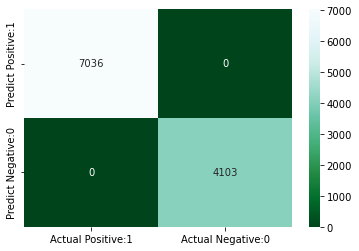

In [88]:
sns.heatmap(cm_t, annot=True, fmt='d', cmap='BuGn_r')

In [80]:
score=[acc,pre,rec,f1,auc]

In [82]:
pd.DataFrame(score,index=['정확도','정밀도','재현율','F1_score','ROC_auc_score'],columns=['summary'])

,summary
정확도,1.0
정밀도,1.0
재현율,1.0
F1_score,1.0
ROC_auc_score,1.0


In [8]:
# 기본 모델에서 가장 성능이 좋았던 하이퍼 파라미터
svm=SVC(kernel='rbf',C=1.0,gamma=3)

In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

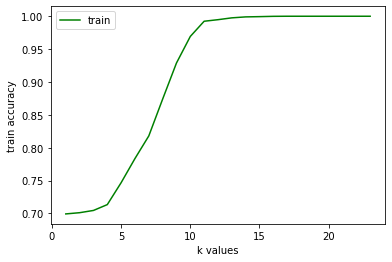

In [176]:
accuracy_list_train = []
k=np.arange(1,24,1)
for each in k:
    # 1~23개의 피처를 이용해  피처 개수마다 서포트벡터머신 적용
    x_new = SelectKBest(f_classif, k=each).fit_transform(x_train_s, y_train_s)
    svm.fit(x_new,y_train_s)
    # 1~23개 이용할 때 마다 계산된 정확도를 저장
    accuracy_list_train.append(svm.score(x_new,y_train_s))   

## 피처데이터 개수에 따른 정확도

In [180]:
select=pd.DataFrame({'features':k,'train accuracy':accuracy_list_train})

In [181]:
select.to_csv('./select.csv')

In [16]:
select_f=pd.read_csv('./select.csv',index_col=0)

### 베스트 feature 9개만으로 정확도가 90%를 넘고, 17개에서 100%(train data 기준)

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
select_f

,features,train accuracy
0,1,0.699212
1,2,0.701075
2,3,0.704487
3,4,0.713375
4,5,0.746729
5,6,0.783494
6,7,0.817902
7,8,0.873881
8,9,0.928826
9,10,0.969273


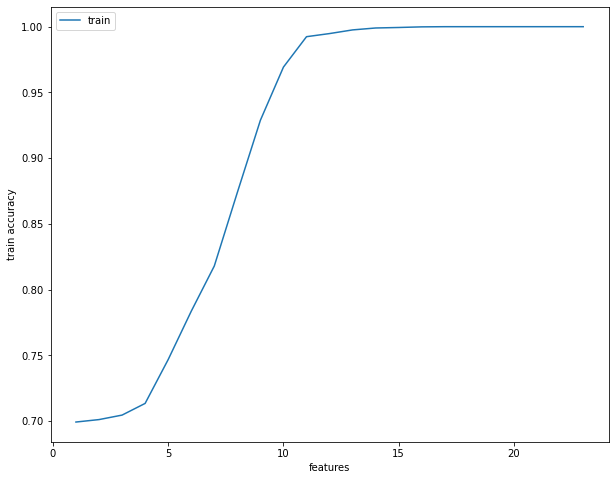

In [26]:
plt.figure(figsize=(10,8))
plt.plot(select_f['features'],select_f['train accuracy'])
plt.xlabel("features")
plt.ylabel("train accuracy")
plt.legend(['train'])
plt.show()

In [21]:
sel = SelectKBest(f_classif, k =16 )
x_new = sel.fit_transform(x_train_s, y_train_s)
x_new_t=sel.fit_transform(x_test_s,y_test_s)
feat_tr = x_train_s.columns.values[sel.get_support()]
feat_te = x_test_s.columns.values[sel.get_support()]
print("x train features:",feat_tr)
print("x test features:",feat_te)

x train features: ['age' 'height(cm)' 'weight(kg)' 'waist(cm)' 'systolic' 'relaxation'
 'fasting blood sugar' 'triglyceride' 'HDL' 'hemoglobin'
 'serum creatinine' 'ALT' 'Gtp' 'gender' 'tartar' 'dental caries']
x test features: ['age' 'height(cm)' 'weight(kg)' 'waist(cm)' 'systolic' 'relaxation'
 'fasting blood sugar' 'triglyceride' 'HDL' 'hemoglobin'
 'serum creatinine' 'ALT' 'Gtp' 'gender' 'tartar' 'dental caries']


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
x_train_new=x_train_s[feat_tr]

In [44]:
x_train_new.head()

,age,height(cm),weight(kg),waist(cm),systolic,relaxation,fasting blood sugar,triglyceride,HDL,hemoglobin,serum creatinine,ALT,Gtp,gender,tartar,dental caries
0,-0.348302,-1.049853,-0.458800,-0.083771,-0.550024,-0.313914,-0.255217,-0.624508,1.061947,-1.100546,-0.823115,-0.254602,-0.257586,0,1,0.0
1,-0.348302,-0.506284,-0.458800,-0.116105,-0.184756,-0.623346,1.471806,-0.163686,-1.033346,-1.228353,-1.265418,-0.254602,-0.435020,0,1,0.0
2,0.892501,0.580854,-0.458800,-0.223885,1.203261,1.026958,-0.495081,0.771922,-0.154675,0.752662,0.503794,-0.349076,-0.356161,1,0,0.0
3,-0.348302,0.037285,0.321016,0.638353,-1.572773,-1.654787,-0.159271,1.777351,-0.830575,0.049721,0.503794,-0.034160,-0.435020,1,1,0.0
4,-0.348302,-1.049853,-0.458800,0.422793,-0.111703,-0.210770,-0.926837,-0.736223,0.318456,-1.356160,-1.265418,-0.412060,-0.356161,0,0,0.0


In [45]:
x_train_new.shape

(44553, 16)

In [46]:
x_test_new=x_test_s[feat_te]

In [47]:
x_test_new.head()

,age,height(cm),weight(kg),waist(cm),systolic,relaxation,fasting blood sugar,triglyceride,HDL,hemoglobin,serum creatinine,ALT,Gtp,gender,tartar,dental caries
0,2.960507,-0.506284,-0.068892,0.961692,-0.111703,0.408094,0.608295,-0.833973,0.250866,-0.078086,0.503794,-0.254602,-0.021007,1,0,0.0
1,-1.175504,0.037285,1.880649,1.716150,1.057153,0.717526,-0.159271,-0.373151,0.048096,0.624854,0.061491,0.312248,-0.119581,1,0,0.0
2,-0.348302,0.580854,0.710924,-0.116105,1.203261,1.026958,-0.351163,1.232744,-1.371296,1.136084,-0.823115,0.154790,0.649301,1,0,0.0
3,-0.761903,1.124422,0.321016,-0.223885,2.810438,2.470975,0.032620,0.674172,-0.289855,0.433143,-0.823115,0.879098,0.195858,1,0,0.0
4,-0.761903,-0.506284,0.710924,1.177251,0.253565,0.408094,0.848159,-0.191615,0.048096,0.049721,0.946097,0.973573,0.314147,1,0,0.0


In [48]:
x_test_new.shape

(11139, 16)

In [49]:
start=time.time()
model_sel=SVC(kernel='rbf',C=1,gamma=3).fit(x_train_new,y_train_s)
print(time.time()-start)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


431.7355465888977


In [50]:
start=time.time()
score_new_tr=model_sel.score (x_train_new, y_train_s)
score_new_te=model_sel.score (x_test_new, y_test_s)
print('model 훈련 점수 : {: .3f}'.format(score_new_tr))
print('model 테스트 점수 : {: .3f}'.format(score_new_te))
print(time.time()-start)

model 훈련 점수 :  1.000
model 테스트 점수 :  1.000
321.30212211608887


In [51]:
sel2 = SelectKBest(f_classif, k =17 )
x_new2 = sel2.fit_transform(x_train_s, y_train_s)
x_new_t2=sel2.fit_transform(x_test_s,y_test_s)
feat_tr2 = x_train_s.columns.values[sel2.get_support()]
feat_te2 = x_test_s.columns.values[sel2.get_support()]
print("x train features:",feat_tr2)
print("x test features:",feat_te2)

x train features: ['age' 'height(cm)' 'weight(kg)' 'waist(cm)' 'eyesight(left)' 'systolic'
 'relaxation' 'fasting blood sugar' 'triglyceride' 'HDL' 'hemoglobin'
 'serum creatinine' 'ALT' 'Gtp' 'gender' 'tartar' 'dental caries']
x test features: ['age' 'height(cm)' 'weight(kg)' 'waist(cm)' 'eyesight(left)' 'systolic'
 'relaxation' 'fasting blood sugar' 'triglyceride' 'HDL' 'hemoglobin'
 'serum creatinine' 'ALT' 'Gtp' 'gender' 'tartar' 'dental caries']


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [52]:
x_train_new2=x_train_s[feat_tr2]
x_test_new2=x_test_s[feat_te2]

In [53]:
start=time.time()
model_sel2=SVC(kernel='rbf',C=1,gamma=3).fit(x_train_new2,y_train_s)
print(time.time()-start)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


460.4813275337219


In [54]:
start=time.time()
score_new_tr2=model_sel2.score (x_train_new2, y_train_s)
score_new_te2=model_sel2.score (x_test_new2, y_test_s)
print('model 훈련 점수 : {: .3f}'.format(score_new_tr2))
print('model 테스트 점수 : {: .3f}'.format(score_new_te2))
print(time.time()-start)

model 훈련 점수 :  1.000
model 테스트 점수 :  1.000
327.54679465293884


## 최종결론 : 12개의 변수만으로도 99% 이상의 성능을 낼 수 있으므로 selectkbest함수를 이용해 영향력이 높은 feature를 추출한 후, 선택된 feature들로 모델링하는 것이 성능이 좋다고 판단?

In [55]:
sel3 = SelectKBest(f_classif, k =15 )
x_new3 = sel3.fit_transform(x_train_s, y_train_s)
x_new_t3=sel3.fit_transform(x_test_s,y_test_s)
feat_tr3 = x_train_s.columns.values[sel3.get_support()]
feat_te3 = x_test_s.columns.values[sel3.get_support()]
print("x train features:",feat_tr3)
print("x test features:",feat_te3)

x train features: ['age' 'height(cm)' 'weight(kg)' 'waist(cm)' 'relaxation'
 'fasting blood sugar' 'triglyceride' 'HDL' 'hemoglobin'
 'serum creatinine' 'ALT' 'Gtp' 'gender' 'tartar' 'dental caries']
x test features: ['age' 'height(cm)' 'weight(kg)' 'waist(cm)' 'relaxation'
 'fasting blood sugar' 'triglyceride' 'HDL' 'hemoglobin'
 'serum creatinine' 'ALT' 'Gtp' 'gender' 'tartar' 'dental caries']


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [56]:
x_train_new3=x_train_s[feat_tr3]
x_test_new3=x_test_s[feat_te3]

In [57]:
x_train_new3.shape

(44553, 15)

In [58]:
x_test_new3.shape

(11139, 15)

In [61]:
start=time.time()
model_sel3=SVC(kernel='rbf',C=1,gamma=3).fit(x_train_new3,y_train_s)
print(time.time()-start)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


381.27207255363464


In [ ]:
start=time.time()
score_new_tr3=model_sel3.score (x_train_new3, y_train_s)
score_new_te3=model_sel3.score (x_test_new3, y_test_s)
print('model 훈련 점수 : {: .3f}'.format(score_new_tr3))
print('model 테스트 점수 : {: .3f}'.format(score_new_te3))
print(time.time()-start)

In [15]:
sel4 = SelectKBest(f_classif, k =9 )
x_new4 = sel4.fit_transform(x_train_s, y_train_s)
x_new_t4=sel4.fit_transform(x_test_s,y_test_s)
feat_tr4 = x_train_s.columns.values[sel4.get_support()]
feat_te4 = x_test_s.columns.values[sel4.get_support()]
print("x train features:",feat_tr4)
print("x test features:",feat_te4)

x train features: ['height(cm)' 'weight(kg)' 'waist(cm)' 'triglyceride' 'HDL' 'hemoglobin'
 'serum creatinine' 'Gtp' 'gender']
x test features: ['height(cm)' 'weight(kg)' 'waist(cm)' 'triglyceride' 'HDL' 'hemoglobin'
 'serum creatinine' 'Gtp' 'gender']


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
x_train_new4=x_train_s[feat_tr4]
x_test_new4=x_test_s[feat_te4]

In [17]:
x_train_new4.shape

(44553, 9)

In [18]:
x_test_new4.shape

(11139, 9)

In [19]:
start=time.time()
model_sel4=SVC(kernel='rbf',C=1,gamma=3).fit(x_train_new4,y_train_s)
print(time.time()-start)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


352.099054813385


In [20]:
start=time.time()
score_new_tr4=model_sel4.score (x_train_new4, y_train_s)
score_new_te4=model_sel4.score (x_test_new4, y_test_s)
print('model 훈련 점수 : {: .3f}'.format(score_new_tr4))
print('model 테스트 점수 : {: .3f}'.format(score_new_te4))
print(time.time()-start)

model 훈련 점수 :  0.929
model 테스트 점수 :  0.928
240.30412983894348


## 변수선택 함수

In [18]:
def sel_f(x_train,y_train,x_test,y_test,k):
    sel = SelectKBest(f_classif, k = k )
    x_new = sel.fit_transform(x_train_s, y_train_s)
    x_new_t=sel.fit_transform(x_test_s,y_test_s)
    feat_tr = x_train_s.columns.values[sel.get_support()]
    #feat_te = x_test_s.columns.values[sel.get_support()]
    #print("x train features:",feat_tr)
    #print("x test features:",feat_te)
    return feat_tr


In [19]:
sel_f(x_train_s,y_train_s,x_test_s,y_test_s,16)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'systolic',
       'relaxation', 'fasting blood sugar', 'triglyceride', 'HDL',
       'hemoglobin', 'serum creatinine', 'ALT', 'Gtp', 'gender', 'tartar',
       'dental caries'], dtype=object)

# 변수 제거 후 재모델링(bmi,wwi)

In [59]:
x_train_s.drop(['bmi','wwi'],axis=1)

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,Cholesterol,...,Urine protein,serum creatinine,AST,ALT,Gtp,gender,tartar,hearing(right),hearing(left),dental caries
0,-0.348302,-1.049853,-0.458800,-0.083771,0.385691,-0.016643,-0.550024,-0.313914,-0.255217,0.494320,...,-0.214896,-0.823115,-0.430331,-0.254602,-0.257586,0,1,1.0,1.0,0.0
1,-0.348302,-0.506284,-0.458800,-0.116105,-0.433770,-0.835046,-0.184756,-0.623346,1.471806,-0.137158,...,-0.214896,-1.265418,-0.220763,-0.254602,-0.435020,0,1,1.0,1.0,0.0
2,0.892501,0.580854,-0.458800,-0.223885,-0.433770,-0.425844,1.203261,1.026958,-0.495081,1.235620,...,-0.214896,0.503794,-0.273155,-0.349076,-0.356161,1,0,1.0,1.0,0.0
3,-0.348302,0.037285,0.321016,0.638353,1.000286,1.006362,-1.572773,-1.654787,-0.159271,3.432064,...,-0.214896,0.503794,-0.377939,-0.034160,-0.435020,1,1,1.0,1.0,0.0
4,-0.348302,-1.049853,-0.458800,0.422793,-0.024040,-0.016643,-0.111703,-0.210770,-0.926837,-0.356803,...,-0.214896,-1.265418,-0.535115,-0.412060,-0.356161,0,0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44548,0.478900,0.580854,-0.068892,0.638353,0.385691,0.392559,1.933796,1.852111,0.128566,-0.411714,...,-0.214896,0.503794,0.984253,0.690148,0.215573,1,1,1.0,1.0,0.0
44549,-0.761903,1.124422,0.321016,0.207234,-0.843500,-0.630445,-1.207506,-0.210770,-0.543054,-0.274436,...,-0.214896,0.061491,-0.325547,-0.412060,-0.474450,1,1,1.0,1.0,0.0
44550,-0.761903,1.124422,0.321016,-1.204680,1.000286,1.006362,-0.403917,-0.623346,-0.207244,-1.427569,...,-0.214896,0.503794,-0.430331,-0.254602,-0.592740,1,1,1.0,1.0,0.0
44551,0.478900,0.037285,1.880649,2.664611,-0.433770,-1.039647,0.034404,-0.107626,-0.399135,-0.494080,...,-0.214896,0.061491,0.198373,0.690148,-0.001292,1,1,1.0,1.0,0.0


In [60]:
x_train_d = x_train_s.drop(['bmi','wwi'],axis=1)
x_test_d = x_test_s.drop(['bmi','wwi'],axis=1)
y_train_d = y_train_s
y_test_d = y_test_s

In [61]:
x_train_d.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,Cholesterol,...,Urine protein,serum creatinine,AST,ALT,Gtp,gender,tartar,hearing(right),hearing(left),dental caries
0,-0.348302,-1.049853,-0.458800,-0.083771,0.385691,-0.016643,-0.550024,-0.313914,-0.255217,0.494320,...,-0.214896,-0.823115,-0.430331,-0.254602,-0.257586,0,1,1.0,1.0,0.0
1,-0.348302,-0.506284,-0.458800,-0.116105,-0.433770,-0.835046,-0.184756,-0.623346,1.471806,-0.137158,...,-0.214896,-1.265418,-0.220763,-0.254602,-0.435020,0,1,1.0,1.0,0.0
2,0.892501,0.580854,-0.458800,-0.223885,-0.433770,-0.425844,1.203261,1.026958,-0.495081,1.235620,...,-0.214896,0.503794,-0.273155,-0.349076,-0.356161,1,0,1.0,1.0,0.0
3,-0.348302,0.037285,0.321016,0.638353,1.000286,1.006362,-1.572773,-1.654787,-0.159271,3.432064,...,-0.214896,0.503794,-0.377939,-0.034160,-0.435020,1,1,1.0,1.0,0.0
4,-0.348302,-1.049853,-0.458800,0.422793,-0.024040,-0.016643,-0.111703,-0.210770,-0.926837,-0.356803,...,-0.214896,-1.265418,-0.535115,-0.412060,-0.356161,0,0,1.0,1.0,0.0


In [62]:
start = time.time()
model5_d=SVC(kernel='rbf',C=1.0,gamma=3).fit(x_train_d,y_train_d)
print("time :", time.time() - start)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


time : 505.98181080818176


In [65]:
print('model 훈련 점수 : {: .3f}'.format(model5_d.score (x_train_d, y_train_d)))
print('model 테스트 점수 : {: .3f}'.format(model5_d.score (x_test_d, y_test_d)))

model 훈련 점수 :  1.000
model 테스트 점수 :  0.995


### Colab 실행결과

# 

## 성능(연산속도 or 정확도) 낮음

In [63]:
start = time.time()
model6_d=SVC(kernel='rbf',C=0.5,gamma=1).fit(x_train_d,y_train_d)
print("time :", time.time() - start)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


time : 343.5571677684784


In [66]:
print('model 훈련 점수 : {: .3f}'.format(model6_d.score (x_train_d, y_train_d)))
print('model 테스트 점수 : {: .3f}'.format(model6_d.score (x_test_d, y_test_d)))

model 훈련 점수 :  0.722
model 테스트 점수 :  0.711


In [64]:
start = time.time()
model3_d=SVC(kernel='rbf',C=5,gamma=3).fit(x_train_d,y_train_d)
print("time :", time.time() - start)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


time : 631.4597039222717


In [68]:
print('model 훈련 점수 : {: .3f}'.format(model3_d.score (x_train_d, y_train_d)))
print('model 테스트 점수 : {: .3f}'.format(model3_d.score (x_test_d, y_test_d)))

model 훈련 점수 :  1.000
model 테스트 점수 :  0.998


## 성능 평가

In [80]:
model5_d.n_features_in_

24

In [127]:
start = time.time()

pred2=model5_d.predict(x_train_d)
confusion_m=confusion_matrix( y_train_d, pred2)

print("time :", time.time() - start)

time : 297.63191056251526


In [128]:
print(confusion_m)

[[28201     0]
 [    0 16352]]


In [74]:
start = time.time()

pred_t2=model5_d.predict(x_test_d)
confusion_m2=confusion_matrix( y_test_d, pred_t)

print("time :", time.time() - start)

time : 58.323668479919434


In [129]:
print(confusion_m2)

[[7036    0]
 [  57 4046]]


### Colab 실행결과

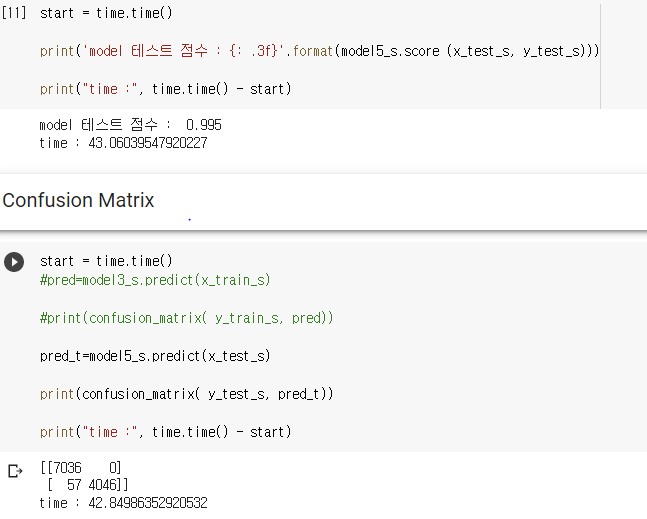

### 테스트 데이터의 정확도, 정밀도, 재현율, f1score

In [91]:
start=time.time()
acc=accuracy_score(y_test_s,pred_t)
pre=precision_score(y_test_s , pred_t)
rec=recall_score(y_test_s , pred_t)
f1=f1_score(y_test_s,pred_t)
auc=roc_auc_score(y_test_s, pred_t)
print(time.time()-start)

0.023177623748779297


In [94]:
# 정확도
print('정확도 : {:.3f}'.format(acc))
# 정밀도
print('정밀도 : {:.3f}'.format(pre))
# 재현율
print('재현율 : {:.3f}'.format(rec))
# f1_score
print('F1_score : {:.3f}'.format(f1))
# AUC score 
print('ROC_AUC_score : {:.3f}'.format(auc))

정확도 : 0.995
정밀도 : 1.000
재현율 : 0.986
F1_score : 0.993
ROC_AUC_score : 0.993


## 모델 저장

In [ ]:
joblib.dump(model5_d, './model5_d.pkl')
joblib.dump(model3_d, './model3_d.pkl')
joblib.dump(model4_d, './model4_d.pkl')

### ROC CURVE

In [ ]:
# 하이퍼파라미터 probability=True를 추가하면 약 2시간 소요

In [ ]:
start = time.time()
model3_s=SVC(kernel='rbf',C=5,gamma=3,probability=True).fit(x_train_s,y_train_s)

print('model 훈련 점수 : {: .3f}'.format(model3_s.score (x_train_s, y_train_s)))
print('model 테스트 점수 : {: .3f}'.format(model3_s.score (x_test_s, y_test_s)))
print("time :", time.time() - start)

In [ ]:
pred_proba=model3_s.predict_proba(x_test_s)[:,1]
fprs,tprs,thresholds=roc_curve(y_test_s,pred_proba)

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [ ]:
plt.plot(fprs,tprs)